## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [12]:
import os
import keras

# 請嘗試設定 GPU：os.environ

os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [13]:
train, test = keras.datasets.cifar10.load_data()

In [16]:
## 資料前處理
def preproc_x(x, flatten=True):
    #m = x.min
    #M = x.max
    #x = (x - (m+M)/2) / ((m+M)/2)
    x = (x - 127.5) / (127.5)
    if flatten:
        x = x.reshape((len(x), -1))
    return x
def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [17]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [20]:
def build_mlp(input_shape, output_units=10, num_neurons=[256, 128, 64, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [21]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer4 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 10)                170       
Total para

In [22]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [23]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0822 22:54:56.350188  7348 deprecation_wrapper.py:119] From C:\Users\Hsin-PC\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0822 22:54:56.538337  7348 deprecation_wrapper.py:119] From C:\Users\Hsin-PC\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [24]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0822 22:55:49.564232  7348 deprecation.py:323] From C:\Users\Hsin-PC\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0822 22:55:49.717338  7348 deprecation_wrapper.py:119] From C:\Users\Hsin-PC\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 12s 247us/step - loss: 1.8309 - acc: 0.3479 - val_loss: 1.6173 - val_acc: 0.4330
Epoch 2/100
50000/50000 [==============================] - 9s 188us/step - loss: 1.5545 - acc: 0.4536 - val_loss: 1.5274 - val_acc: 0.4598
Epoch 3/100
50000/50000 [==============================] - 9s 178us/step - loss: 1.4340 - acc: 0.4959 - val_loss: 1.4773 - val_acc: 0.4835
Epoch 4/100
50000/50000 [==============================] - 9s 187us/step - loss: 1.3505 - acc: 0.5250 - val_loss: 1.4396 - val_acc: 0.4950
Epoch 5/100
50000/50000 [==============================] - 9s 170us/step - loss: 1.2719 - acc: 0.5544 - val_loss: 1.4101 - val_acc: 0.5145
Epoch 6/100
50000/50000 [==============================] - 9s 186us/step - loss: 1.2072 - acc: 0.5781 - val_loss: 1.3941 - val_acc: 0.5164
Epoch 7/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.1438 - acc: 0.5983 - val_loss: 1

50000/50000 [==============================] - 8s 169us/step - loss: 0.1354 - acc: 0.9540 - val_loss: 3.6869 - val_acc: 0.5037
Epoch 60/100
50000/50000 [==============================] - 8s 166us/step - loss: 0.1630 - acc: 0.9439 - val_loss: 3.6785 - val_acc: 0.5023
Epoch 61/100
50000/50000 [==============================] - 9s 172us/step - loss: 0.1680 - acc: 0.9435 - val_loss: 3.6681 - val_acc: 0.5089
Epoch 62/100
50000/50000 [==============================] - 9s 172us/step - loss: 0.1516 - acc: 0.9490 - val_loss: 3.6792 - val_acc: 0.5082
Epoch 63/100
50000/50000 [==============================] - 8s 168us/step - loss: 0.1323 - acc: 0.9553 - val_loss: 3.7536 - val_acc: 0.5002
Epoch 64/100
50000/50000 [==============================] - 8s 169us/step - loss: 0.1395 - acc: 0.9519 - val_loss: 3.6891 - val_acc: 0.5067
Epoch 65/100
50000/50000 [==============================] - 8s 169us/step - loss: 0.1339 - acc: 0.9548 - val_loss: 3.8710 - val_acc: 0.5063
Epoch 66/100
50000/50000 [=======

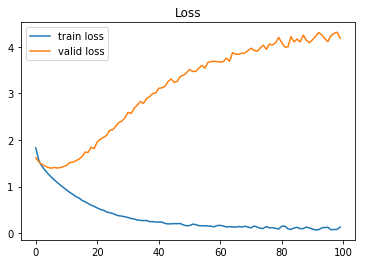

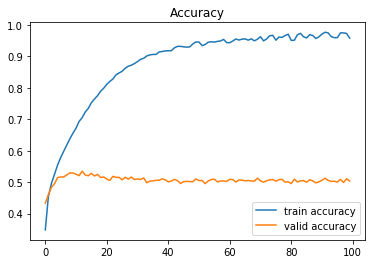

In [26]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()